In [4]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
import main

%matplotlib inline

In [5]:
### Load and Clean EU Emissions
eu_emissions = main.load_clean_eu_emissions()

### Load and Clean US Emissions
us_emissions = main.load_clean_us_emissions()

### Load EU locations
eu_loc = main.load_eu_locations()

### Load US locations
us_loc = main.load_us_locations()

### Transform and Load EU Particulate Matter data
eu_PM_by_country = main.load_pollutant_by_area(eu_emissions , 2016)

### Transform and Load EU Particulate Matter data
us_PM_by_country = main.load_pollutant_by_area(us_emissions, 2016)

### Italy & California - Mortality due to respiratory issues
respiratory_mortality_ita, respiratory_mortality_cal = main.load_respiratory_mortality()

### Italy - Particulate matter data joined with health data - respiratory related mortality
df_pm_and_mortality_ita = main.load_PM_dataframe_ita(eu_emissions, respiratory_mortality_ita)

### California - Particulate matter data joined with health data - respiratory related mortality
df_pm_and_mortality_cal = main.load_PM_dataframe_cal(us_emissions, respiratory_mortality_cal, us_loc)


# Section 3 - Particulate Matter - Which countries in U.S. and EU are the worse?

## Sub-Questions
- What are the country / state emissions of particulate matter in EU and U.S. respectively?
- Which countries are the worst offenders?
- What are the emission ranges within EU and U.S.?
- How do the emissions compare between Europe and U.S. 


## Pre-processing Steps
1. Sum particukate matter (PM2.5, PM10) emissions by country / state
2. Calculate emissions per capita to improve comparative value of data
3. Prepare data for plotting by using merge functionality to join data to include country codes for EU and state names for U.S.

In [35]:
eu_emissions.head()

,country,pollutant_name,sector_name,year,emissions
0,Austria,NH3,Fuel Comb Industrial,2004-01-01,0.020000
1,Austria,NH3,Fuel Comb Industrial,2000-01-01,0.003686
2,Austria,NH3,Fuel Comb Industrial,2002-01-01,0.003983
3,Austria,NH3,Fuel Comb Industrial,2000-01-01,0.030000
4,Austria,NH3,Fuel Comb Elec Util,2008-01-01,0.300000


In [36]:
us_emissions.head()

,state,sector_name,pollutant_name,year,emissions
16771,AL,FUEL COMB. ELEC. UTIL.,CO,2000-01-01,9.384833
16772,AL,FUEL COMB. ELEC. UTIL.,NH3,2000-01-01,0.015376
16773,AL,FUEL COMB. ELEC. UTIL.,NOx,2000-01-01,165.410696
16774,AL,FUEL COMB. ELEC. UTIL.,PM10,2000-01-01,26.235898
16775,AL,FUEL COMB. ELEC. UTIL.,PM2.5,2000-01-01,22.142701


In [27]:
eu_PM_by_country.head()

pollutant_name,year,PM2.5,PM10
subarea,,,
Austria,2016-01-01,20.954260,35.459789
Belgium,2016-01-01,29.487781,39.822770
Bulgaria,2016-01-01,31.748459,47.616594
Croatia,2016-01-01,18.257203,25.420127
Cyprus,2016-01-01,1.766892,2.620133


In [28]:
us_PM_by_country.head()

pollutant_name,year,PM2.5,PM10
subarea,,,
AK,2016-01-01,169.874855,248.738967
AL,2016-01-01,168.346590,491.252767
AR,2016-01-01,108.926526,335.552569
AZ,2016-01-01,71.199509,281.027122
CA,2016-01-01,378.880869,697.090946


In [29]:
eu_loc.head()

,subarea,code,geo_size,population
0,Austria,AUT,83879.0,8576234.0
1,Belgium,BEL,30528.0,11258434.0
2,Bulgaria,BGR,110370.0,7202198.0
3,Croatia,HRV,56594.0,4225316.0
4,Cyprus,CYP,9251.0,847008.0


In [30]:
us_loc.head()

,subarea,code,geo_size,population
0,Alabama,AL,135767,4672840
1,Alaska,AK,1723337,680300
2,Arizona,AZ,295234,6167681
3,Arkansas,AR,137732,2848650
4,California,CA,423972,36250311


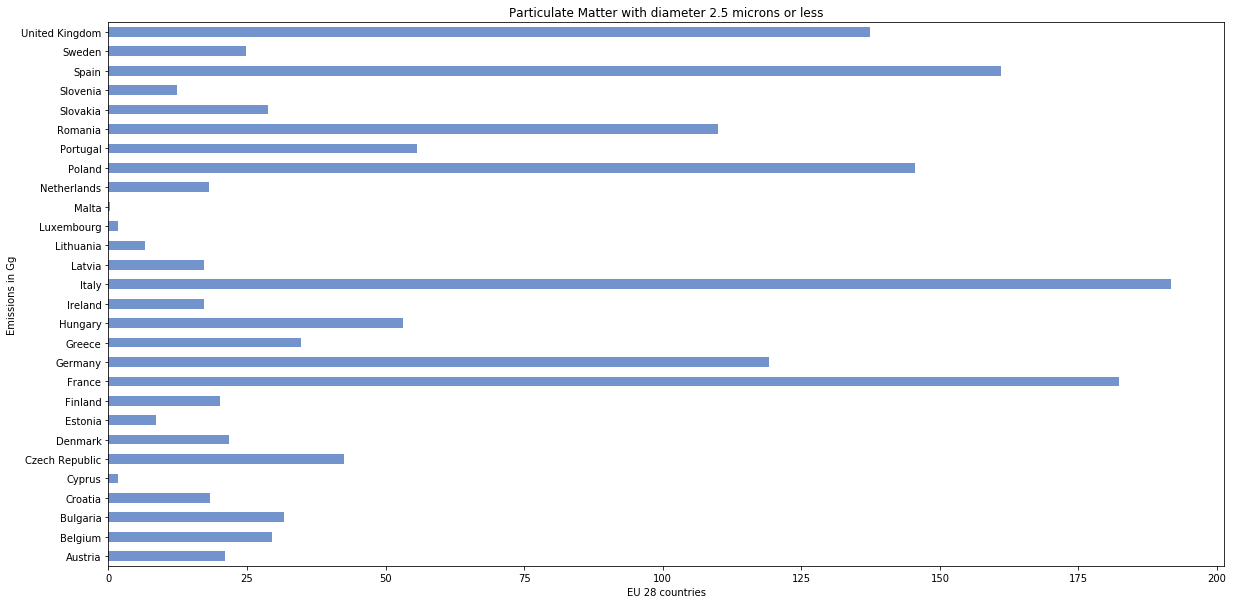

In [6]:
main.emissions_area_bars(eu_PM_by_country, '2.5', 10, 'EU 28 countries', '#7293CB')

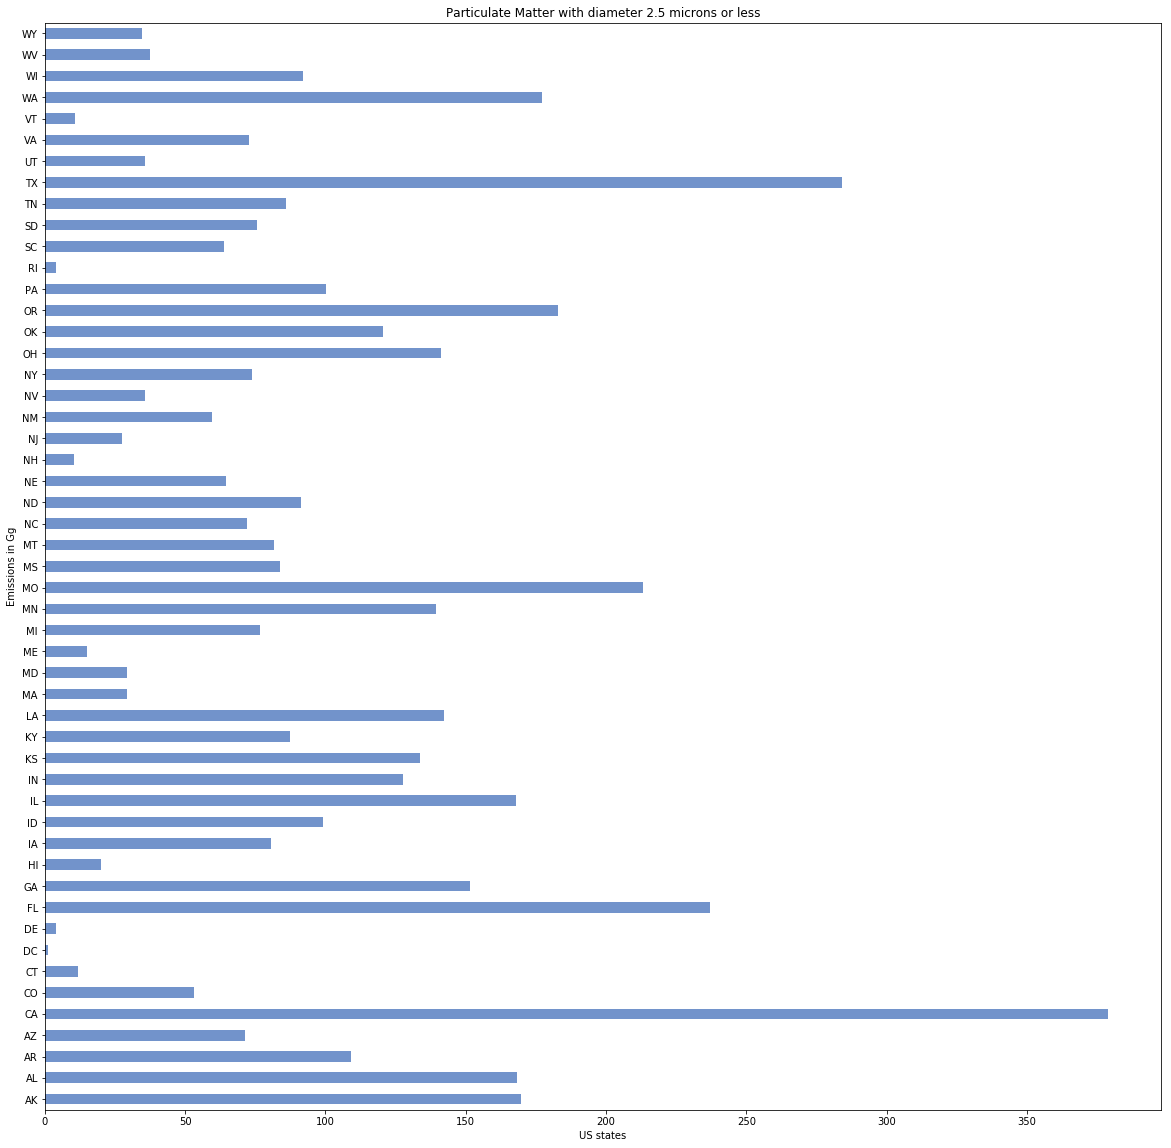

In [7]:
main.emissions_area_bars(us_PM_by_country, '2.5', 20, 'US states', '#7293CB')

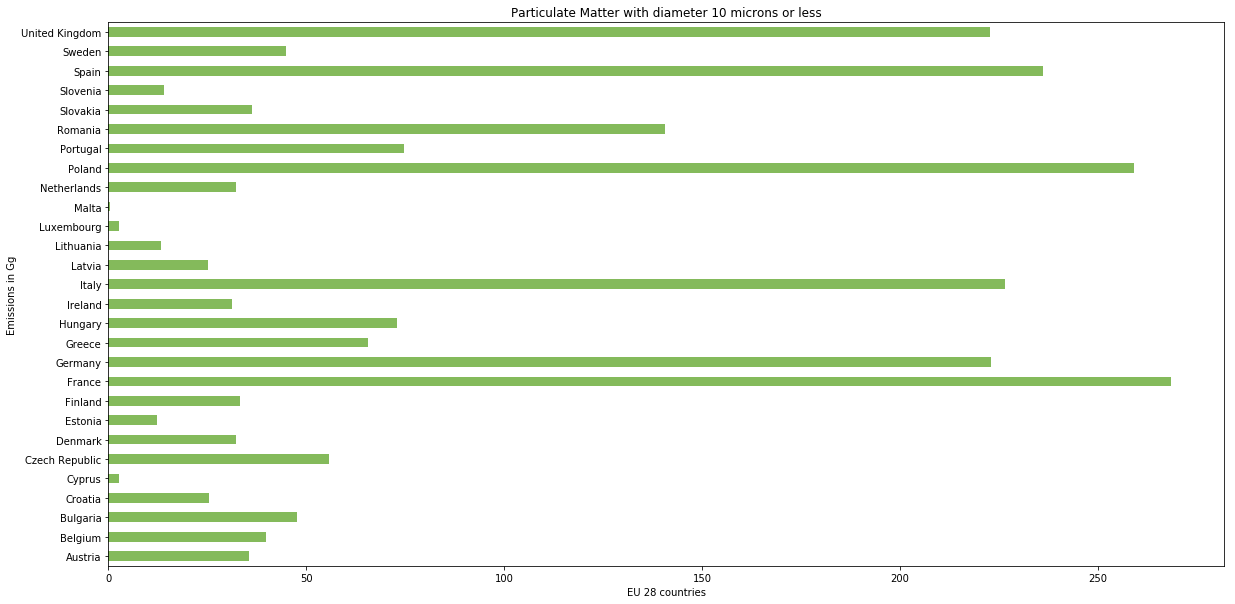

In [8]:
main.emissions_area_bars(eu_PM_by_country, '10', 10, 'EU 28 countries', '#84BA5B')

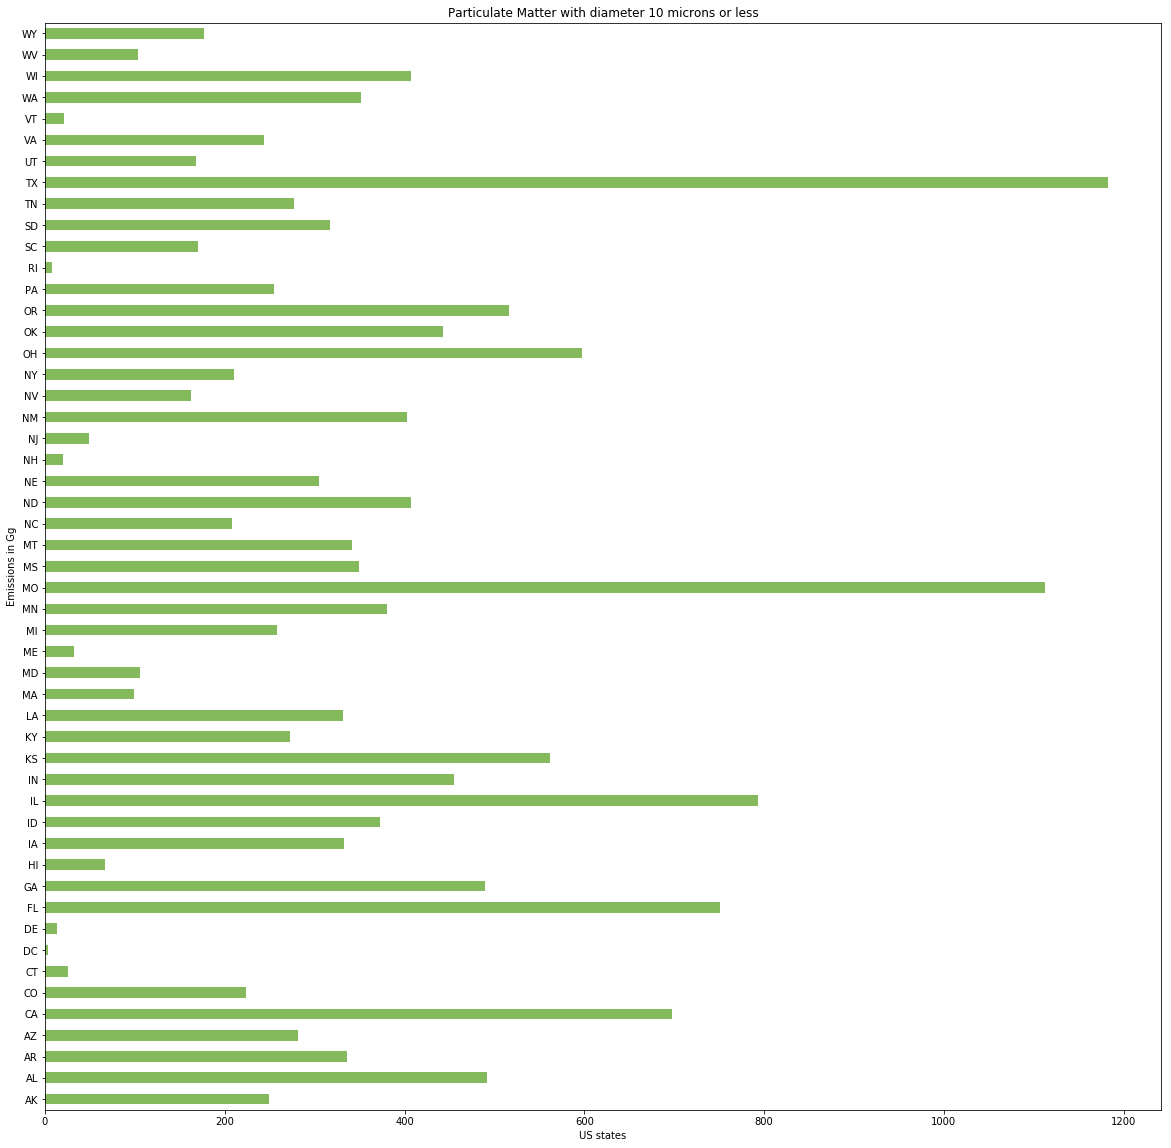

In [9]:
main.emissions_area_bars(us_PM_by_country, '10', 20, 'US states', '#84BA5B')

In [10]:
# EU PM2.5 total emmissions
main.make_choropleth(
    main.choro_table_norm(
        main.choro_table(eu_emissions, eu_loc, 'PM2.5'), 'PM2.5'), 'PM2.5','d3-world-map', False, None, 50, 
    'equirectangular', None, False)

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~m_walekova/0 or inside your plot.ly account where it is named 'd3-world-map'


C:\Users\walek\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [11]:
# EU PM2.5 emmissions per capita
main.make_choropleth(
    main.choro_table_norm(
        main.choro_table(eu_emissions, eu_loc, 'PM2.5'), 'PM2.5'), 'PM2.5','d3-world-map', True, None, 1,
    'equirectangular', None, False)

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~m_walekova/0 or inside your plot.ly account where it is named 'd3-world-map'


C:\Users\walek\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [12]:
# US PM2.5 total emmissions
main.make_choropleth(
    main.choro_table_norm(
        main.choro_table(us_emissions, us_loc, 'PM2.5'), 'PM2.5'), 'PM2.5','d3-cloropleth-map', False, None, 50,
    'albers usa','USA-states', False )

C:\Users\walek\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [13]:
# US PM2.5 emmissions per capita
main.make_choropleth(
    main.choro_table_norm(
        main.choro_table(us_emissions, us_loc, 'PM2.5'), 'PM2.5'), 'PM2.5','d3-cloropleth-map', True, None, 50,
    'albers usa','USA-states', False )

C:\Users\walek\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [14]:
# EU PM2.5 total emmissions
main.make_choropleth(
    main.choro_table_norm(
        main.choro_table(eu_emissions, eu_loc, 'PM2.5'), 'PM2.5'), 'PM2.5','d3-world-map', False, 380, 50,
    'equirectangular', None, True)

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~m_walekova/0 or inside your plot.ly account where it is named 'd3-world-map'


C:\Users\walek\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [15]:
# EU PM2.5 emmissions per capita
main.make_choropleth(
    main.choro_table_norm(
        main.choro_table(eu_emissions, eu_loc, 'PM2.5'), 'PM2.5'), 'PM2.5','d3-world-map', True, 250, 50,
    'equirectangular', None, True)

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~m_walekova/0 or inside your plot.ly account where it is named 'd3-world-map'


C:\Users\walek\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [16]:
# EU PM10 total emmissions
main.make_choropleth(
    main.choro_table_norm(
        main.choro_table(eu_emissions, eu_loc, 'PM10'), 'PM10'), 'PM10','d3-world-map', False, None, 50, 
    'equirectangular', None, False)

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~m_walekova/0 or inside your plot.ly account where it is named 'd3-world-map'


C:\Users\walek\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [17]:
# EU PM10 emmissions per capita
main.make_choropleth(
    main.choro_table_norm(
        main.choro_table(eu_emissions, eu_loc, 'PM10'), 'PM10'), 'PM10','d3-world-map', True, None, 1,
    'equirectangular', None, False)

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~m_walekova/0 or inside your plot.ly account where it is named 'd3-world-map'


C:\Users\walek\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [18]:
# EU PM10 emmissions per capita
main.make_choropleth(
    main.choro_table_norm(
        main.choro_table(us_emissions, us_loc, 'PM10'), 'PM10'), 'PM10','d3-cloropleth-map', False, None, 50,
    'albers usa','USA-states', False )

C:\Users\walek\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [19]:
# EU PM10 emmissions per capita
main.make_choropleth(
    main.choro_table_norm(
        main.choro_table(us_emissions, us_loc, 'PM10'), 'PM10'), 'PM10','d3-cloropleth-map', True, None, 50,
    'albers usa','USA-states', False )

C:\Users\walek\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [20]:
# EU PM10 total emmissions
main.make_choropleth(
    main.choro_table_norm(
        main.choro_table(eu_emissions, eu_loc, 'PM10'), 'PM10'), 'PM10','d3-world-map', False, 1150, 50,
    'equirectangular', None, True)

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~m_walekova/0 or inside your plot.ly account where it is named 'd3-world-map'


C:\Users\walek\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [21]:
# EU PM10 emmissions per capita
main.make_choropleth(
    main.choro_table_norm(
        main.choro_table(eu_emissions, eu_loc, 'PM10'), 'PM10'), 'PM10','d3-world-map', True, 600, 50,
    'equirectangular', None, True)

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~m_walekova/0 or inside your plot.ly account where it is named 'd3-world-map'


C:\Users\walek\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



# Section 4 - Is there a visible link between respiratory related mortality and particulate matter emissions over time

## Sub-Questions
- Examine lung related mortality statistics in relation to PM2.5 and PM10 emissions 
- Identify any obvious correlation between the two data sets.

## Pre-processing Steps
1. Sum particukate matter (PM2.5, PM10) emissions by country / state
2. Merge emission data with health data

In [33]:
respiratory_mortality_ita.head()

,year,Italy
0,1997,35455.0
1,1998,37270.0
2,1999,39071.0
3,2000,37782.0
4,2001,33826.0


In [34]:
respiratory_mortality_cal.head()

,year,California
0,1997,NaN
1,1998,NaN
2,1999,20193.0
3,2000,23996.0
4,2001,24049.0


In [31]:
df_pm_and_mortality_ita.head()

,year,PM2.5,PM10,NOx,Mortality
0,2000,239.244144,296.205799,1637.183306,37782.0
1,2001,220.202181,275.893939,1607.092091,33826.0
2,2002,181.847910,233.869417,1553.247790,35941.0
3,2003,217.325267,271.126757,1562.486313,40852.0
4,2004,182.814687,233.635825,1522.515410,NaN


In [32]:
df_pm_and_mortality_cal.head()

,year,state,PM2.5,PM10,NOx,Mortality
0,2000,California,364.162286,1128.274644,1305.768612,23996.0
1,2001,California,331.628795,1015.504965,1151.223440,24049.0
2,2002,California,230.288101,625.440575,1362.348420,23648.0
3,2003,California,242.044201,641.443442,1277.173484,24571.0
4,2004,California,253.800300,657.446310,1190.766259,22957.0


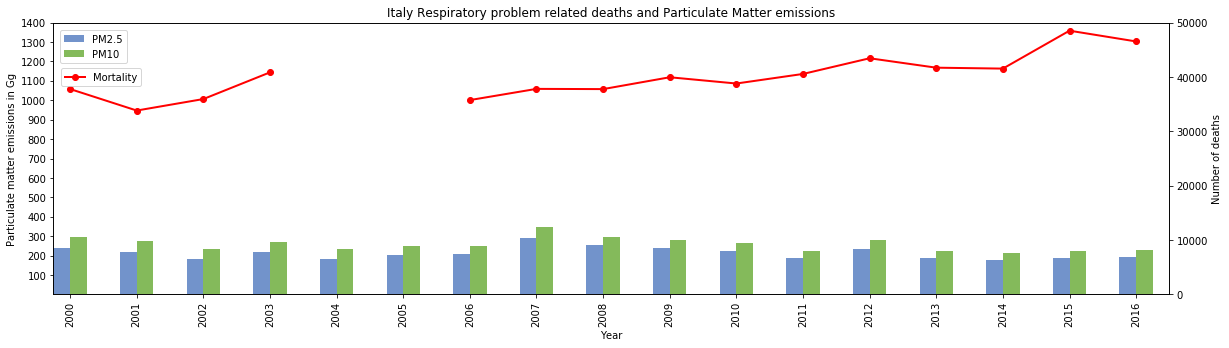

In [22]:
main.mortality_vs_particulate_matter(df_pm_and_mortality_ita, 'Italy')

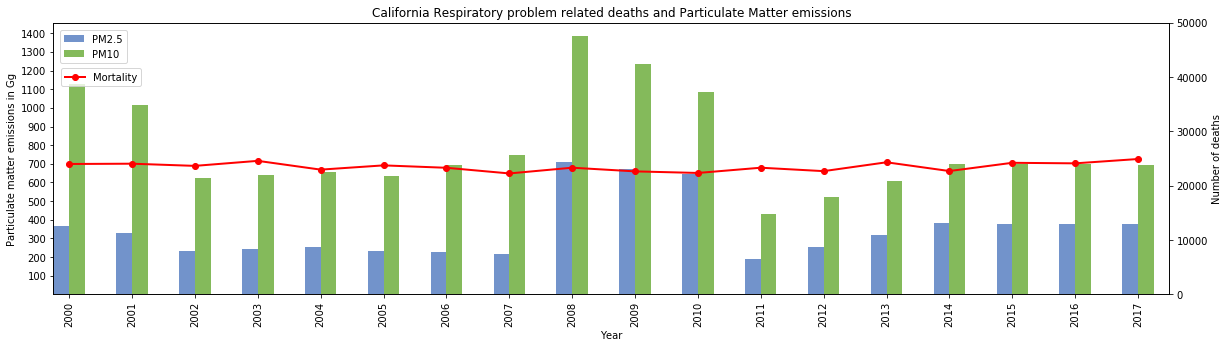

In [23]:
main.mortality_vs_particulate_matter(df_pm_and_mortality_cal, 'California')